Examine the spectral properties of the BOLD signal to determine what interpolation method to use.

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fftn, fftshift, fftfreq
import nibabel as nib
import tqdm

# Load the BOLD signal from all 11 runs and average them
all_bold_data = []
for run in tqdm.tqdm(range(1, 12)):
    bold = nib.load(f'~/rtmindeye/data_sub-005/bids/derivatives/fmriprep/sub-005/ses-01/func/sub-005_ses-01_task-C_run-{run:02d}_space-T1w_desc-preproc_bold.nii.gz')
    all_bold_data.append(bold.get_fdata())

all_bold_data = np.concatenate(all_bold_data, axis=3)

100%|██████████| 11/11 [02:49<00:00, 15.40s/it]


In [ ]:
print(all_bold_data.shape)

(11, 76, 90, 192)
(11, 76, 90, 192)


TypeError: Invalid shape (76, 90, 192) for image data

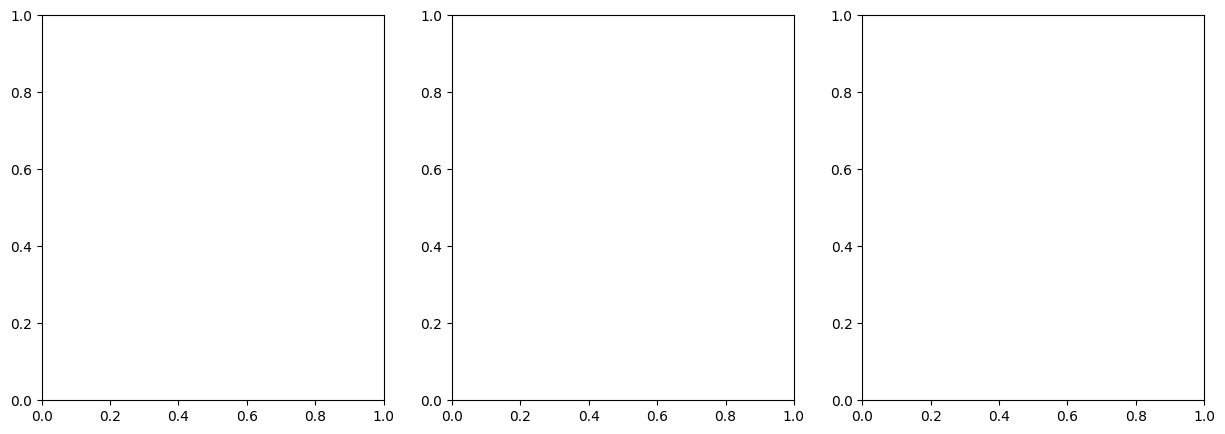

In [79]:
# average across timepoints
mean_bold = np.mean(bold_data, axis=3)
print(mean_bold.shape)

# Compute the 3D Fourier Transform
bold_fft = fftn(mean_bold)
bold_fft_shifted = fftshift(np.abs(bold_fft))
print(bold_fft_shifted.shape)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    axs[i].imshow(np.log(1 + np.abs(np.mean(bold_fft_shifted, axis=i))), cmap='inferno', aspect='auto')
    axs[i].set_title(f"Averaged over {['x', 'y', 'z'][i]}-axis")

fig.supxlabel('Frequency (Hz)')
fig.supylabel('Frequency (Hz)')
fig.suptitle("Spatial Frequency Spectrum of BOLD Data")
plt.tight_layout()
plt.show()

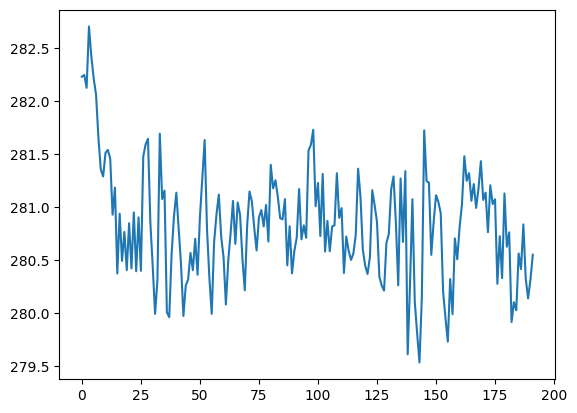

In [37]:
# # plot bold signal
# x, y, z = bold_data.shape[0]//2, bold_data.shape[1]//2, bold_data.shape[2]//2
# plt.plot(bold_data[x, y, z, :])
# plt.show()

# plot average bold signal across all voxels
plt.plot(np.mean(bold_data, axis=(0,1,2)))
plt.show()


(192,)


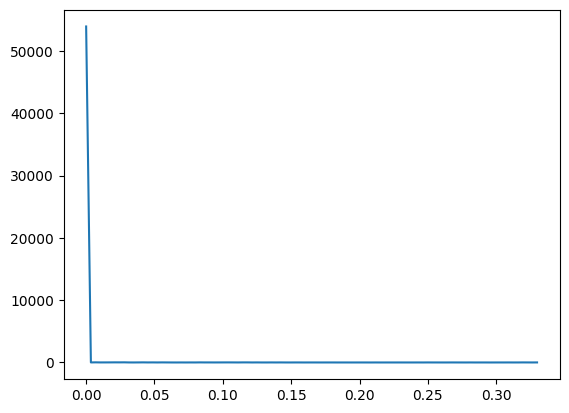

Dominant frequency: 0.0 Hz
High frequency power: 0.0


In [40]:
# compute temporal power spectrum
TR = 1.5
fs = 1/TR

# select mean of all voxels
time_series = np.mean(bold_data, axis=(0,1,2))
print(time_series.shape)

# compute 1D fft of time series
freqs = fftfreq(len(time_series), d=TR)
fft_values = np.abs(np.fft.fft(time_series))

# keep only positive frequencies
fft_values = fft_values[:len(time_series)//2]
freqs = freqs[:len(time_series)//2]

plt.plot(freqs, fft_values)
plt.show()

# summary statistics 
dominant_freq = freqs[np.argmax(fft_values)]
high_freq_power = np.sum(fft_values[freqs > 1])

print(f"Dominant frequency: {dominant_freq} Hz")
print(f"High frequency power: {high_freq_power}")
